In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod 
import random
from numba import njit
from numba.experimental import jitclass
from numba import int32, float64
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import mpl_toolkits.mplot3d 
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from cxplain.xkm import XkmExplainer
from cxplain.tree import  DecisionTreeExplainer, RandomForestExplainer, ExKMCExplainer
from cxplain.shap import  ShapExplainer
from cxplain.gradient import GradientExplainer  
from cxplain.metrics import EuclideanMetric, Metric, ManhattenMetric
from cxplain.neon import NeonKMeansExplainer
from cxplain.errors import NonExistingRelevanceError
from imputer import NormalCKDEImputer, EmpiricalRandomImputer, get_imputer
from datasets import IrisDataset, WineDataset, WholeSaleDataset, LiveSellersDataset, BuddyMoveDataset, SyntheticDataset

C:\Users\fottneal\Documents\code\cluster-explain\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
iris_data = IrisDataset.load_and_clean_dataset()

n_clusters = iris_data.n_clusters
X = iris_data.features
y = iris_data.targets
n_obs = iris_data.n_obs
n_features = iris_data.n_features
feature_names = iris_data.feature_names

# fit Kmeans
kmeans = KMeans(n_clusters=n_clusters, random_state=3).fit(X)
cluster_centers = kmeans.cluster_centers_
predictions = kmeans.predict(X)
explained_clustering = XkmExplainer(X,  kmeans.cluster_centers_, "next_best", "euclidean", predictions, feature_names).fit_explain()

In [3]:
pointwise_relevance = explained_clustering.pointwise_relevance
cluster_relevance = explained_clustering.cluster_relevance
global_relevance = explained_clustering.global_relevance

In [4]:
pointwise_relevance.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
subset_index = list(range(0, 21))
feature = "sepal length (cm)"

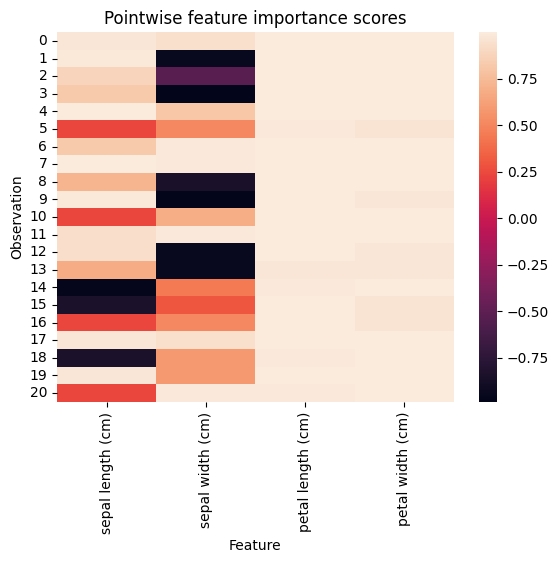

In [6]:
explained_clustering.show_pointwise_relevance(subset_index)

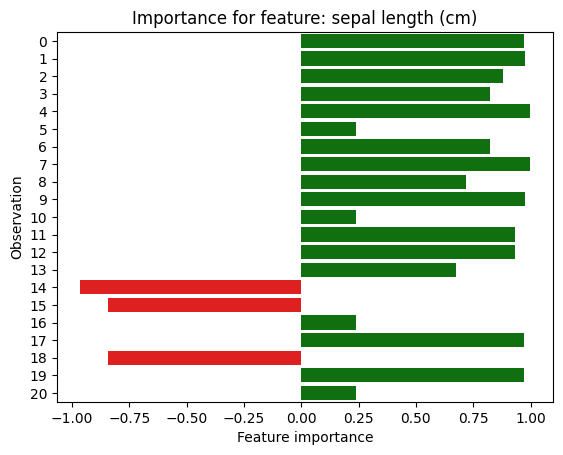

In [7]:
explained_clustering.show_pointwise_relevance_for_feature(feature, subset_index)

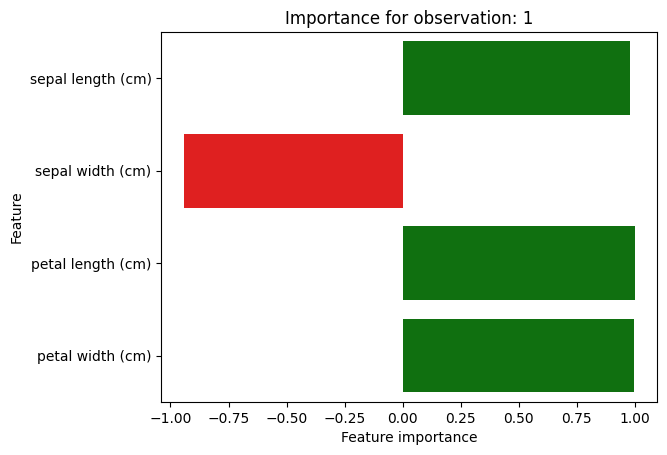

In [8]:
explained_clustering.show_pointwise_relevance_for_observation(1)

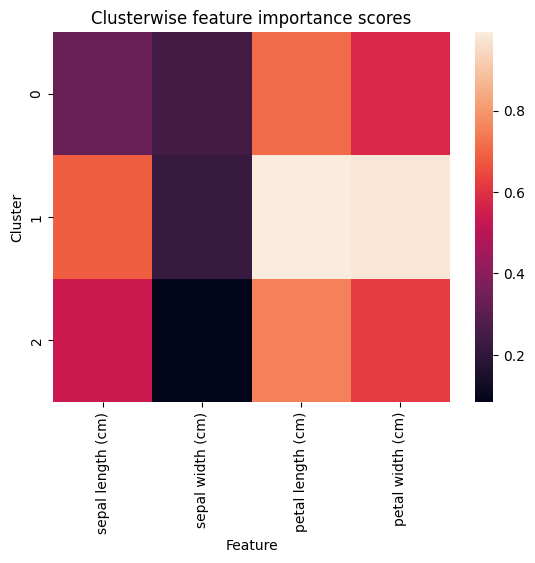

In [9]:
explained_clustering.show_cluster_relevance()

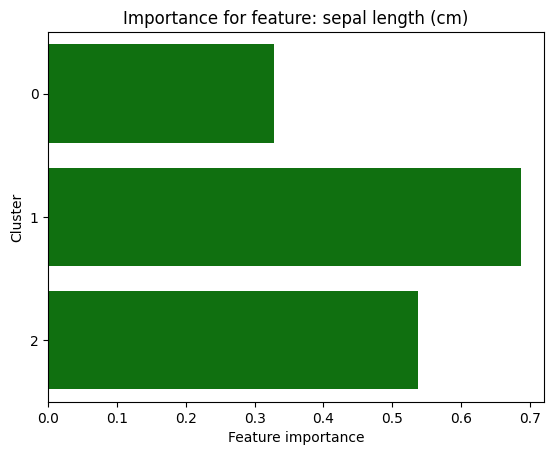

In [10]:
explained_clustering.show_cluster_relevance_for_feature(feature)

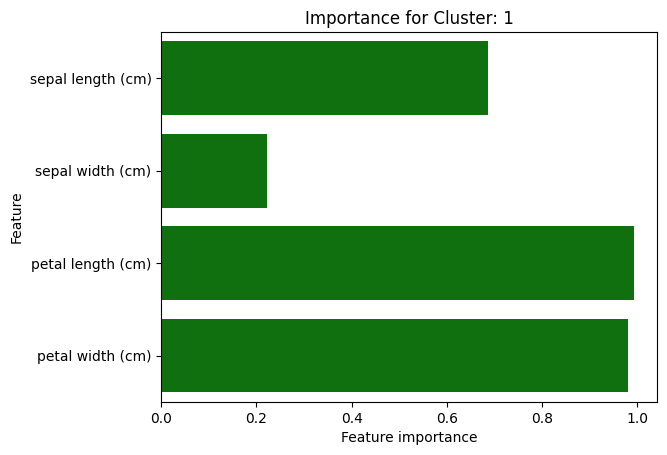

In [12]:
explained_clustering.show_cluster_relevance_for_cluster(1)

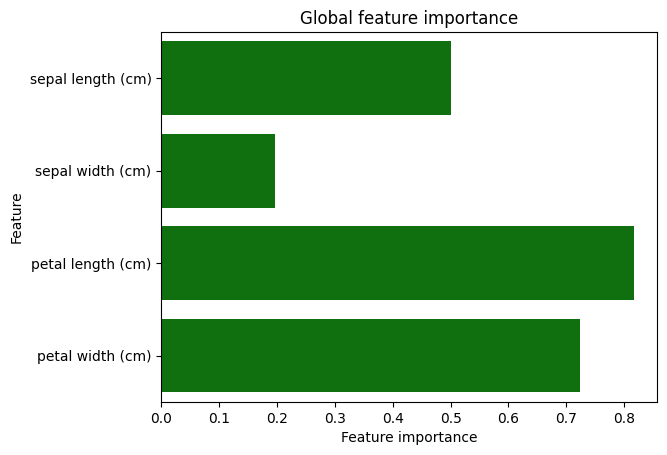

In [13]:
explained_clustering.show_global_relevance()